# **2. Python Classes and Objects, NumPy basics**

# 배열 복습

In [ ]:
debits = []
credits = []

In [ ]:
def add_to_debits(value):
  global debits
  debits += [value]

def add_to_credits(value):
  global credits
  credits += [value]

In [ ]:
add_to_credits(1000)
add_to_debits(10)
add_to_debits(15)
add_to_debits(100)

In [ ]:
# 알맞게 list에 추가된 것 확인
print(debits)
print(credits)

[10, 15, 100]
[1000]


In [ ]:
# global keyword를 반점으로 연속해서 사용가능
def total_value():
  global debits, credits
  total = 0
  for val in debits:
    total -= val
  for val in credits:
    total += val
  return total

In [ ]:
# 1000에서 10, 15, 100을 뺀값인 875 확인
total_value()

875

# 클래스와 오브젝트 사용

# Exercise 1
Account 클래스에 기능을 추가해야됨
1. 출금금액이 잔액보다 많으면 출금 실패
2. 한계좌에서 다른계좌로 돈을 옮기는 transfer 함수 구현(한계좌에선 출금, 다른 계좌에선 입금으로 처리)

In [ ]:
# Account 클래스 생성
class Account:
  def __init__(self, owner, money=0):
    self.owner = owner
    self.money = money

  def deposit(self, credit):
    if credit <= 0:
      raise ValueError('입금 금액이 잘못 입력되었습니다.')
    self.money += credit
    print(f"{self.owner}님 계좌에 {credit}원 입금되었습니다.")

  def withdraw(self, credit):
    if credit > self.money:
      raise ValueError("잔액이 부족합니다.")
    self.money -= credit
    print(f"{self.owner}님 계좌에서 {credit}원 출금되었습니다.")

  def transfer(self, other_account, credit):
    if credit > self.money:
      raise ValueError("잔액이 부족합니다.")
    self.withdraw(credit)
    other_account.deposit(credit)
    print(f"{self.owner}님이 {other_account.owner}님에게 {credit}원을 입금하였습니다.")

  def __str__(self):
    return f"{self.owner}님의 잔액은 {self.money}원입니다."

In [ ]:
a1 = Account("치훈", 10000)
a2 = Account("하민", 5000)

a1.deposit(2000)
a1.withdraw(4500)
a2.transfer(a1, 3000)

print(a1)
print(a2)

치훈님 계좌에 2000원 입금되었습니다.
치훈님 계좌에서 4500원 출금되었습니다.
하민님 계좌에서 3000원 출금되었습니다.
치훈님 계좌에 3000원 입금되었습니다.
하민님이 치훈님에게 3000원을 입금하였습니다.
치훈님의 잔액은 10500원 입니다.
하민님의 잔액은 2000원 입니다.


# Exercise 2
Rational(유리수) class의 연산자 오버로딩 기능을 추가한다.

* `*` - use `__mul__` 두유리수의 곱셈
* `/` - use `__truediv__` 두유리수의 나눗셈
* `-` - use `__sub__` 두유리수의 뺄셈

In [ ]:
# isinstance(x, type)
# isinstance로 x가 type에 해당되는 인스턴스인지 확인하고 처리
import math

class Rational:
    def __init__(self, p, q=1):

        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise TypeError('Numerator must be an integer')
        if not isinstance(q, int):
            raise TypeError('Denominator must be an integer')

        g = math.gcd(p, q)

        self.p = p // g
        self.q = q // g

    # 유리수를 float으로 변환
    def __float__(self):
        return float(self.p) / float(self.q)

    # print를 위해 유리수를 string으로 변환
    def __str__(self):
        return '%d / %d' % (self.p, self.q)

    # 두 유리수를 더하는 연산 (제공된 코드 사용)
    def __add__(self, other):
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        return float(self) + float(other)

    def __radd__(self, other):
        return self + other

    # 두 유리수를 빼는 연산
    def __sub__(self, other):
      if isinstance(other, Rational):
        return Rational(self.p * other.q - other.p * self.q, self.q * other.q)
      elif isinstance(other, int):
        return Rational(self.p - other * self.q, self.q)
      return float(self) + float(other)

    # 두 유리수를 곱하는 연산
    def __mul__(self, other):
      if isinstance(other, Rational):
        return Rational(self.p * other.p, self.q * other.q)
      elif isinstance(other, int):
        return Rational(self.p * other, self.q)
      return float(self) * float(other)

    # 두 유리수를 나누는 연산(0으로 나누는 예외 처리)
    def __truediv__(self, other):
      if isinstance(other, Rational):
        if other.p == 0:
          raise ZeroDivisionError("0으로 나눌수 없습니다.")
        return Rational(self.p * other.q, self.q * other.p)
      elif isinstance(other, int):
        if other == 0:
          raise ZeroDivisionError("0으로 나눌수 없습니다.")
        return Rational(self.p, self.q * other)
      return float(self) / float(other)

In [ ]:
a = Rational(3, 4)
b = Rational(2, 5)
print(a)
print(b)
print('a + b = ', a + b)
print('a - b = ', a - b)
print('a * b = ', a * b)
print('a / b = ', a / b)

3 / 4
2 / 5
a + b =  23 / 20
a - b =  7 / 20
a * b =  3 / 10
a / b =  15 / 8


# Exercise 3
바빌로니아 제곱근 알고리즘을 이용해 어떤 수 S의 제곱근을 근사적으로 계산하는 함수를 만들어야함

1. 임의의 초기값 x를 설정 (보통 x = S/2)
2. x = 1/2 * (x + S/x) 를 반복하여 S의 제곱근을 근사적으로 계산

In [ ]:
def babylonian(S, num_iters=5):
  if S < 0:
    raise ValueError("음수의 제곱근을 ")
  if S == 0:
    return 0

  x = S / 2
  for i in range(num_iters):
    x = 0.5 * (x + S / x)
  return x

In [ ]:
# 근사 횟수를 늘려 더 정확한 제곱근 계산가능
import math

print(math.sqrt(24))
print(babylonian(24))
print(babylonian(24, 10))

4.898979485566356
4.898979485575103
4.898979485566356


# 넘파이 복습
넘파이를 통해 다차원 배열을 구현

In [ ]:
import math
math.sin(5)

-0.9589242746631385

In [ ]:
import math as m
m.sin(5)

-0.9589242746631385

In [ ]:
import numpy as np

In [ ]:
x = np.array([[0, 1], [1, 5]])
x

array([[0, 1],
       [1, 5]])

In [ ]:
y = np.array([[4, 0], [0, 4]])
y

array([[4, 0],
       [0, 4]])

In [ ]:
print(x+y,'\n')
print(x ** 2,'\n')
print(x @ y,'\n')
print(np.sum(x))

[[4 1]
 [1 9]] 

[[ 0  1]
 [ 1 25]] 

[[ 0  4]
 [ 4 20]] 

7


In [ ]:
# for loop과 numpy의 dot product 연산을 비교해서 어떤 것이 더 효율적인지 비교
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = 0
for i in range(10000):
  z += x[i] * y[i]

3.49 ms ± 83.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# 시간을 비교했을 때 numpy가 연산의 효율성이 더 높
%%timeit
x = np.random.rand(10000)
y = np.random.rand(10000)
z = np.dot(x, y)

200 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
X = np.zeros((10, 10))
print(X)
print(X.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(10, 10)


In [ ]:
Y = np.ones((10,10))
print(Y)
print(2*Y+3)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]


In [ ]:
# 균등분포에 따라 무작위 난수 행렬 생성
R = np.random.rand(5,5)
R

array([[0.67646429, 0.39388839, 0.14119447, 0.05107096, 0.79315692],
       [0.79559271, 0.45777015, 0.87975962, 0.08885923, 0.08860237],
       [0.07387045, 0.84539341, 0.02470274, 0.82294013, 0.72899001],
       [0.68468621, 0.83560774, 0.65529532, 0.55694269, 0.60835005],
       [0.88375606, 0.56679023, 0.37179393, 0.29988989, 0.74377427]])

In [ ]:
# 표준 정규분포에 따라 무작위 난수 행렬 생
Rn = np.random.randn(5,5)
Rn

array([[ 0.36472298, -0.10018431, -0.46546875,  1.1954187 , -0.84326133],
       [ 0.75273288,  2.03034389, -0.22362999,  0.67054247,  0.39232827],
       [ 0.28693922, -0.44092188, -0.77769606,  0.95344725,  1.31170553],
       [ 1.30472858,  0.80849441, -0.09537424, -0.75990619,  0.18292072],
       [-1.57654474, -0.60914692, -1.6142787 ,  0.34328421,  0.14822152]])

In [ ]:
# 1부터 100 미만까지 2씩 증가하며 숫자 생성
np.arange(1,100,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [ ]:
# 0부터 5까지 균등하게 나눈 10개값 생성
np.linspace(0,5,10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [ ]:
# 0부터 99까지 100개의 정수 배열 생성
X = np.arange(0, 100)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
# 10행 10열의 2차원 배열로 변
X.reshape((10,10))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

# Exercise 4
1. 50 ~ 100사이의 난수, 5 x 10 배열 생성
2. 50에서 51사이를 0.01 간격으로 나눈 등간격 배열

In [ ]:
import numpy as np

In [ ]:
# 5 x 10 배열, 50 ~ 100 사이의 난수
arr1 = 50 + 50 * np.random.rand(5, 10)
print(arr1)

[[89.25605107 60.31266393 62.37862479 97.26098637 97.25351729 75.09849149
  87.58520514 73.52750597 65.124054   72.47795119]
 [73.95137268 84.35514807 87.32261237 85.14015131 91.74814504 81.58594467
  70.20147319 97.74288213 96.64038503 76.13454322]
 [90.93461309 79.46557719 59.03802591 71.56221194 59.56219495 71.11919019
  72.5503077  83.20289324 76.65693906 77.74667765]
 [60.96495476 94.45327674 90.97851392 64.61755971 50.30361013 85.70895054
  66.41689659 92.73024156 82.97540144 83.45622116]
 [55.27761292 56.56816763 66.4569349  88.15272842 53.78079531 72.98876209
  95.44572861 60.88802649 58.65291315 84.78152659]]


In [ ]:
# 50부터 51까지 0.01 간격의 배열 생성
arr2 = np.arange(50, 51.01, 0.01)
print(arr2)

[50.   50.01 50.02 50.03 50.04 50.05 50.06 50.07 50.08 50.09 50.1  50.11
 50.12 50.13 50.14 50.15 50.16 50.17 50.18 50.19 50.2  50.21 50.22 50.23
 50.24 50.25 50.26 50.27 50.28 50.29 50.3  50.31 50.32 50.33 50.34 50.35
 50.36 50.37 50.38 50.39 50.4  50.41 50.42 50.43 50.44 50.45 50.46 50.47
 50.48 50.49 50.5  50.51 50.52 50.53 50.54 50.55 50.56 50.57 50.58 50.59
 50.6  50.61 50.62 50.63 50.64 50.65 50.66 50.67 50.68 50.69 50.7  50.71
 50.72 50.73 50.74 50.75 50.76 50.77 50.78 50.79 50.8  50.81 50.82 50.83
 50.84 50.85 50.86 50.87 50.88 50.89 50.9  50.91 50.92 50.93 50.94 50.95
 50.96 50.97 50.98 50.99 51.  ]


# Plotting

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-5, 5, 100)
print(x)

y = x * x
print(y)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

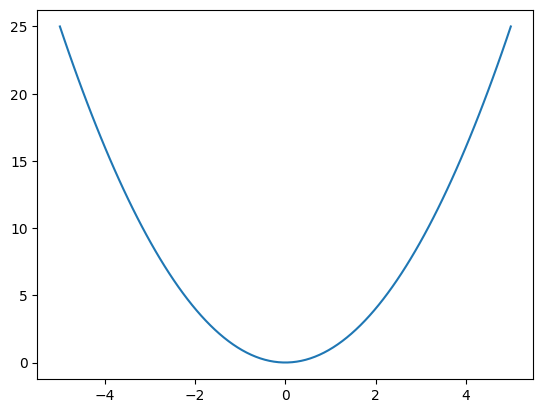

In [ ]:
plt.plot(x, y)

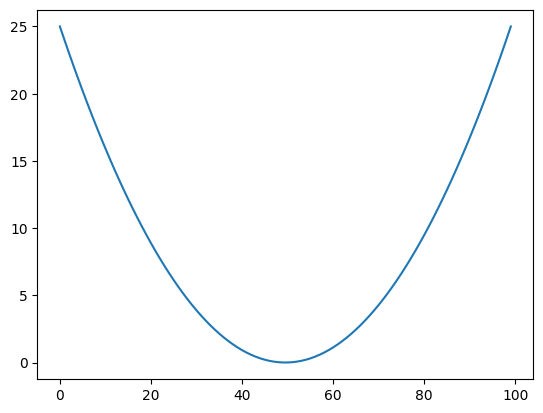

In [ ]:
plt.plot(y)

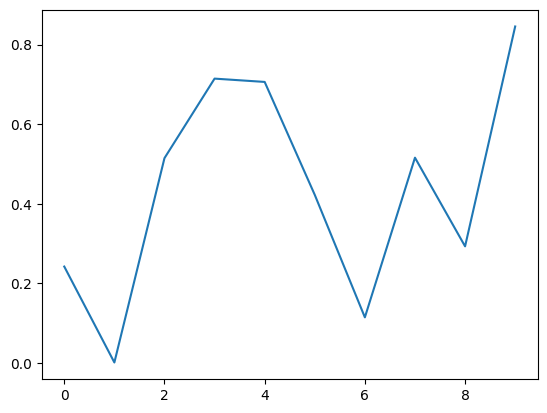

In [ ]:
plt.plot(np.random.rand(10))

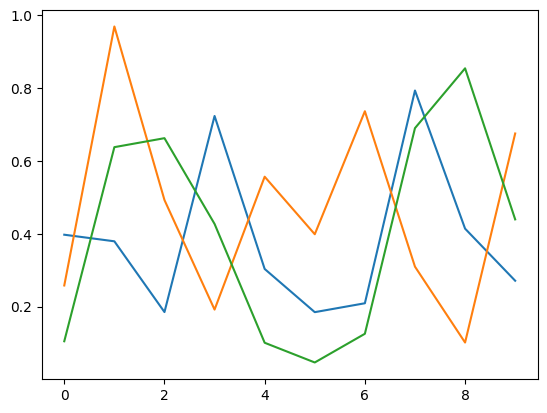

In [ ]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))

Text(0.5, 1.0, 'Title')

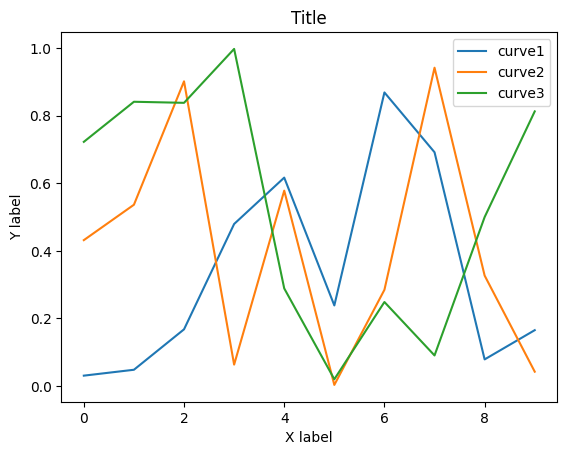

In [ ]:
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.plot(np.random.rand(10))
plt.legend(["curve1", "curve2", "curve3"])
plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("Title")